In [2]:
from astropy.table import Table
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
from scipy.stats import ks_2samp, norm

IMAGE_FORMAT = 'eps'
#IMAGE_DIR = 'C:/Users/jacob/Documents/GitHub/RotationCurves/images'
IMAGE_DIR = '/Users/kellydouglass/Documents/Research/Rotation_curves/RotationCurves/images'

#master_table = Table.read( 'C:/Users/jacob/Documents/GitHub/RotationCurves/master_file.txt', format='ascii.ecsv')
master_table = Table.read('/Users/kellydouglass/Documents/Research/Rotation_curves/RotationCurves/master_file.txt', 
                          format='ascii.ecsv')

###########################################################################
# Hard-coded entry for the bins for the histrogram plots at the end of this
#    function.
#--------------------------------------------------------------------------
hist_range = ( 0, 60)
BINS = np.linspace( hist_range[0], hist_range[1], 13)
###########################################################################

In [3]:
###########################################################################
# Initialize the master arrays that will hold the wall and void mass ratios
#    for plotting the histogram.
#--------------------------------------------------------------------------
dm_to_stellar_mass_ratio_wall = []
dm_to_stellar_mass_ratio_void = []
###########################################################################


###########################################################################
# Import 'vflag' and 'dmMass_to_sMass_ratio' from the 'master_table.'
#--------------------------------------------------------------------------
vflag_list = master_table['vflag'].data
dm_to_stellar_mass_ratio_list = master_table['dmMass_to_sMass_ratio'].data
###########################################################################


###########################################################################
# Separate the mass ratios according to wall or void.
#--------------------------------------------------------------------------
for vflag, mass_ratio in zip( vflag_list, dm_to_stellar_mass_ratio_list):
    if vflag == 0:
        dm_to_stellar_mass_ratio_wall.append( mass_ratio)

    elif vflag == 1:
        dm_to_stellar_mass_ratio_void.append( mass_ratio)
###########################################################################


###########################################################################
# Lists cannot be raised to powers, and this operation is needed to find
#    RMS of the data in question. Thus, the mass ratio lists are converted
#    into np.array() instances here.
#--------------------------------------------------------------------------
dm_to_stellar_mass_ratio_wall = np.array( dm_to_stellar_mass_ratio_wall)
dm_to_stellar_mass_ratio_void = np.array( dm_to_stellar_mass_ratio_void)
###########################################################################


###########################################################################
# Calculate the mean, RMS, and standard deviation for the void, wall, and
#    total distributions in the histogram below.
#--------------------------------------------------------------------------
#    ratio_mean = np.mean( dm_to_stellar_mass_ratio_list)
#    ratio_stdev = np.std( dm_to_stellar_mass_ratio_list)
#    ratio_rms = np.sqrt( np.mean( dm_to_stellar_mass_ratio_list**2))

# ratio_wall_mean = np.mean( dm_to_stellar_mass_ratio_wall)
# ratio_wall_stdev = np.std( dm_to_stellar_mass_ratio_wall)
# ratio_wall_rms = np.sqrt( np.mean( dm_to_stellar_mass_ratio_wall**2))

# ratio_void_mean = np.mean( dm_to_stellar_mass_ratio_void)
# ratio_void_stdev = np.std( dm_to_stellar_mass_ratio_void)
# ratio_void_rms = np.sqrt( np.mean( dm_to_stellar_mass_ratio_void**2))
###########################################################################

/anaconda/envs/python3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


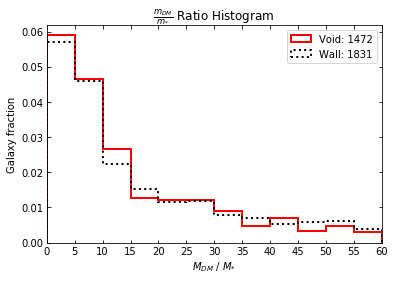

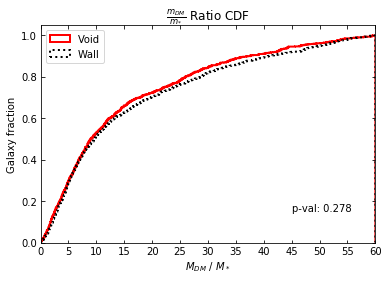

In [14]:
###########################################################################
# Histogram the dark matter to stellar mass ratios as separated by wall
#    versus void as well as the total distribution.
#--------------------------------------------------------------------------
lwidth = 2 # Line width used in plots

dm_to_stellar_mass_hist = plt.figure()
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)

#    plt.hist( dm_to_stellar_mass_ratio_list,
#             BINS, color='green', density=True, alpha=0.9)
#    p = norm.pdf(x, ratio_mean, ratio_stdev)
#    plt.plot(x, p, 'g--', linewidth=2)
#    plt.axvline( ratio_mean, color='green', linestyle='-', linewidth=1.5)
#    plt.axvline( ratio_mean + ratio_stdev,
#                color='green', linestyle=':', linewidth=1)
#    plt.axvline( ratio_mean - ratio_stdev,
#                color='green', linestyle=':', linewidth=1)
#    plt.axvline( ratio_mean + 2*ratio_stdev,
#                color='green', linestyle=':', linewidth=1)
#    plt.axvline( ratio_mean - 2*ratio_stdev,
#                color='green', linestyle=':', linewidth=1)
#    _, mean_ratio_ = plt.ylim()
#    plt.text(ratio_mean + ratio_mean/10,
#         mean_ratio_ - mean_ratio_/10,
#         'Mean: {:.2f}'.format( ratio_mean))

plt.hist( dm_to_stellar_mass_ratio_void, BINS, color='r', range=hist_range, density=True, 
         histtype='step', linewidth=lwidth, 
         label='Void: ' + str( len( dm_to_stellar_mass_ratio_void)))
# p = norm.pdf(x, ratio_void_mean, ratio_void_stdev)
# plt.plot(x, p, 'r--', linewidth=2)
# plt.axvline( ratio_void_mean, color='red', linestyle='-', linewidth=1.5)
# plt.axvline( ratio_void_mean + ratio_void_stdev,
#             color='red', linestyle=':', linewidth=1)
# plt.axvline( ratio_void_mean - ratio_void_stdev,
#             color='red', linestyle=':', linewidth=1)
# plt.axvline( ratio_void_mean + 2*ratio_void_stdev,
#             color='red', linestyle=':', linewidth=1)
# plt.axvline( ratio_void_mean - 2*ratio_void_stdev,
#             color='red', linestyle=':', linewidth=1)
# _, mean_void_ratio_ = plt.ylim()
# plt.text(ratio_void_mean + ratio_void_mean/10,
#      mean_void_ratio_ - mean_void_ratio_/10,
#      'Mean: {:.2f}'.format( ratio_void_mean))

plt.hist( dm_to_stellar_mass_ratio_wall, BINS, color='k', range=hist_range, density=True, 
         histtype='step', linewidth=lwidth, linestyle=':', 
         label='Wall: ' + str( len( dm_to_stellar_mass_ratio_wall)))
# p = norm.pdf(x, ratio_wall_mean, ratio_wall_stdev)
# plt.plot(x, p, 'k--', linewidth=2)
# plt.axvline( ratio_wall_mean, color='black', linestyle='-', linewidth=1.5)
# plt.axvline( ratio_wall_mean + ratio_wall_stdev,
#             color='black', linestyle=':', linewidth=1)
# plt.axvline( ratio_wall_mean - ratio_wall_stdev,
#             color='black', linestyle=':', linewidth=1)
# plt.axvline( ratio_wall_mean + 2*ratio_wall_stdev,
#             color='black', linestyle=':', linewidth=1)
# plt.axvline( ratio_wall_mean - 2*ratio_wall_stdev,
#             color='black', linestyle=':', linewidth=1)
# _, mean_wall_ratio_ = plt.ylim()
# plt.text(ratio_wall_mean + ratio_wall_mean/10,
#      mean_wall_ratio_ - mean_wall_ratio_/10,
#      'Mean: {:.2f}'.format( ratio_wall_mean))


ax = dm_to_stellar_mass_hist.add_subplot(111)
plt.tick_params( axis='both', direction='in')
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
plt.ylabel('Galaxy fraction')
plt.xlabel(r'$M_{DM}$ / $M_{*}$')
plt.xlim( hist_range)
plt.xticks( BINS)
plt.title(r'$\frac{m_{DM}}{m_{*}}$ Ratio Histogram')

#void_patch = mpatches.Patch( color='red', label='Void: ' + str( len( dm_to_stellar_mass_ratio_void)))
#wall_patch = mpatches.Patch( color='black', label='Wall: ' + str( len( dm_to_stellar_mass_ratio_wall)), alpha=0.5)
#plt.legend( handles = [ void_patch, wall_patch])
plt.legend()
plt.show()

# textstr = '\n'.join((
# #          r'STDEV: $%.2f$' % ( ratio_stdev, ),
#       r'$STDEV_{wall}$: $%.2f$' % ( ratio_wall_stdev, ),
#       r'$STDEV_{void}$: $%.2f$' % ( ratio_void_stdev, ),
# #          r'RMS: $%.2f$' % ( ratio_rms, ),
#       r'$RMS_{wall}$: $%.2f$' % ( ratio_wall_rms, ),
#       r'$RMS_{void}$: $%.2f$' % ( ratio_void_rms, )))

# props = dict( boxstyle='round', facecolor='cornsilk', alpha=0.6)

# ax.text(0.72, 0.95, textstr,
#         verticalalignment='top', horizontalalignment='left',
#         transform=ax.transAxes,
#         color='black', fontsize=8, bbox=props)
'''
plt.savefig( IMAGE_DIR + '/histograms/dm_to_stellar_mass_ratio_hist.' + IMAGE_FORMAT,
            format=IMAGE_FORMAT)
'''
plt.show()
#plt.close()
###########################################################################


###########################################################################
# Histogram the dark matter to stellar mass ratios as CDF separated by wall
#    versus void distributions.
#--------------------------------------------------------------------------
ks_stat, p_val = ks_2samp( dm_to_stellar_mass_ratio_wall, dm_to_stellar_mass_ratio_void)

dm_to_stellar_mass_cdf = plt.figure()
plt.hist( dm_to_stellar_mass_ratio_void, bins=1000, range=hist_range, density=True, 
         cumulative=True, histtype='step', color='r', linewidth=lwidth, label='Void')
plt.hist( dm_to_stellar_mass_ratio_wall, bins=1000, range=hist_range, density=True, 
         cumulative=True, histtype='step', color='k', linewidth=lwidth, linestyle=':', 
         label='Wall')

ax = dm_to_stellar_mass_cdf.add_subplot(111)
plt.tick_params( axis='both', direction='in')
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
plt.ylabel('Galaxy fraction')
plt.xlabel(r'$M_{DM}$ / $M_*$')
plt.xlim( hist_range)
plt.xticks( BINS)
plt.title(r'$\frac{m_{DM}}{m_{*}}$ Ratio CDF')
plt.legend(loc='upper left')

plt.text( hist_range[1] * (3/4), 0.15, "p-val: " + "{:.{}f}".format( p_val, 3))
'''
plt.savefig( IMAGE_DIR + '/histograms/dm_to_stellar_mass_ratio_hist.' + IMAGE_FORMAT,
            format=IMAGE_FORMAT)
'''
plt.show()
#plt.close()
###########################################################################

## Bin by absolute magnitude